# Library

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler

#데이터분리
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV

#모델링
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#성과 평가 지표
from sklearn.metrics import accuracy_score, mean_squared_error

# Data load

In [242]:
train=pd.read_csv('/train.csv', index_col=0)
test=pd.read_csv('/test_x.csv', index_col=0)
submission=pd.read_csv('/sample_submission.csv', index_col=0)  
print(train.shape)
print(test.shape)
print(submission.shape)

(73489, 105)
(11383, 76)
(11383, 1)


In [243]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
train.head(20)

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
5,2.0,834,1.0,1769,4.0,2105,1.0,1070,5.0,1930,2.0,1258,5.0,1451,1.0,1029,3.0,1633,1.0,2254,5.0,1984,1.0,1158,3.0,1194,3.0,483,1.0,983,1.0,817,5.0,1052,1.0,1354,1.0,747,2.0,1826,40s,2,1,6,Female,1,3,White,Other,5,5,5,4,5,3,3,7,5,3,2,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6,1.0,1382,1.0,1473,5.0,1479,4.0,2403,1.0,616,2.0,549,5.0,390,4.0,1601,5.0,1312,1.0,1699,4.0,1229,4.0,1175,1.0,1078,4.0,341,5.0,635,2.0,1448,4.0,838,4.0,765,3.0,1954,1.0,1482,20s,2,1,3,Male,1,1,White,Atheist,2,4,3,5,1,1,3,2,1,5,2,1,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1
7,1.0,384,1.0,908,5.0,870,1.0,1059,1.0,1266,1.0,483,1.0,592,1.0,2020,5.0,6022,5.0,2090,4.0,1767,5.0,982,5.0,1576,1.0,782,3.0,911,5.0,417,1.0,392,5.0,1510,1.0,842,1.0,1138,30s,2,1,1,Male,1,1,White,Christian_Other,3,6,0,0,0,0,0,1,2,6,2,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1
8,5.0,795,2.0,3469,4.0,1693,3.0,1991,4.0,5922,2.0,1322,5.0,1014,5.0,3014,3.0,3771,3.0,13295,5.0,3605,3.0,9265,4.0,2531,1.0,812,4.0,2595,5.0,1227,5.0,1837,4.0,1218,4.0,9923,5.0,1631,20s,4,2,0,Female,2,1,Other,Christian_Other,1,1,2,1,2,2,2,2,2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1


In [244]:
train.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

# 기본 정보와 QdE, QdA만 남기고 변수 제거

In [245]:
drop_val = ['QaA', 'QbA', 'QbE', 'QcA', 'QcE', 'QdE', 'QeA','QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE','tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']

train = train.drop(drop_val, axis = 1)
test = test.drop(drop_val, axis = 1)
train.head()
test.head()

,QaE,QdA,age_group,education,engnat,familysize,gender,hand,married,race,religion
index,,,,,,,,,,,
0,736,1.0,10s,2,2,3,Male,1,1,White,Christian_Protestant
1,514,3.0,10s,2,2,2,Male,2,1,Other,Christian_Catholic
2,500,2.0,30s,3,2,7,Male,1,2,Other,Christian_Other
3,669,2.0,60s,4,1,4,Male,1,2,White,Christian_Catholic
4,499,2.0,10s,2,1,3,Male,1,1,White,Agnostic


# missing 처리

In [246]:
#missing 확인
print('train : ',train.isnull().sum())
print('test : ',test.isnull().sum())

train :  QaE           0
QdA           0
age_group     0
education     0
engnat        0
familysize    0
gender        0
hand          0
married       0
race          0
religion      0
voted         0
dtype: int64
test :  QaE           0
QdA           0
age_group     0
education     0
engnat        0
familysize    0
gender        0
hand          0
married       0
race          0
religion      0
dtype: int64


# Preprocessing

In [247]:
#labelencoding
label = LabelEncoder()
train['gender_code'] = label.fit_transform(train['gender'])
train['age_group_code'] = label.fit_transform(train['age_group'])
train['race_code'] = label.fit_transform(train['race'])
train['religion_code'] = label.fit_transform(train['religion'])

test['gender_code'] = label.fit_transform(test['gender'])
test['age_group_code'] = label.fit_transform(test['age_group'])
test['race_code'] = label.fit_transform(test['race'])
test['religion_code'] = label.fit_transform(test['religion'])

drop2 = ['gender','age_group','race','religion']
train = train.drop(drop2, axis = 1)
test = test.drop(drop2, axis = 1)

# Visualization

<BarContainer object of 2 artists>

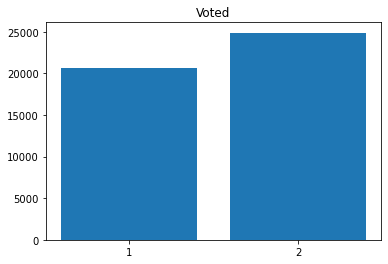

In [248]:
#target 변수의 분포 파악
train_y = train['voted']

tar = [str(train_y.unique()[1]), str(train_y.unique()[0])]
count= [train_y.value_counts()[1], train_y.value_counts()[2]]
plt.title('Voted')
plt.bar(tar, count)

<AxesSubplot:xlabel='gender_code', ylabel='count'>

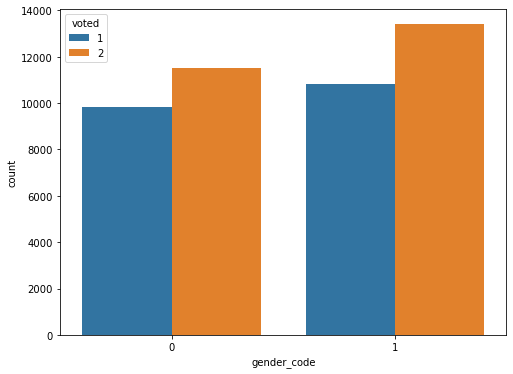

In [249]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'gender_code', hue = train_y)

<AxesSubplot:xlabel='age_group_code', ylabel='count'>

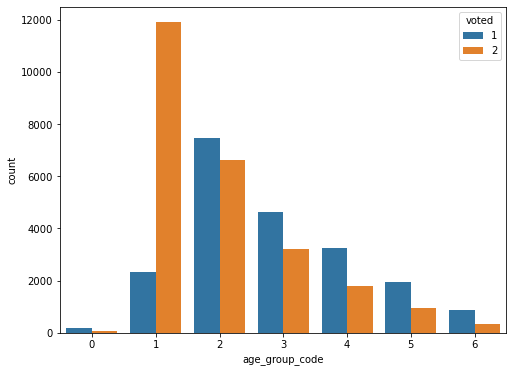

In [250]:
#굉장이 다른 성향을 보이는 age group이 존재
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'age_group_code', hue = train_y)

<AxesSubplot:>

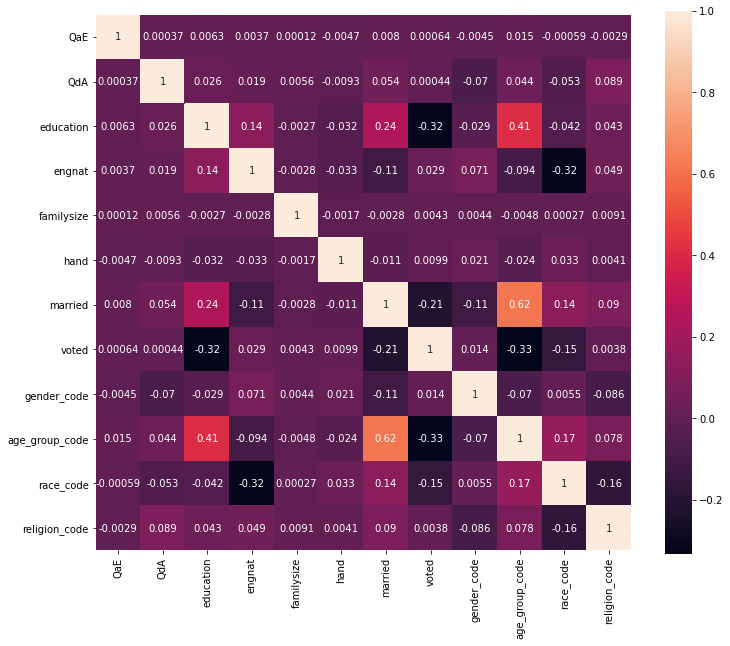

In [251]:
#heatmap
plt.figure(figsize = (12,10))
sns.heatmap(train.corr(),square = True, annot = True)

# Question을 이용한 feature 추출 예시

<AxesSubplot:xlabel='QdA', ylabel='count'>

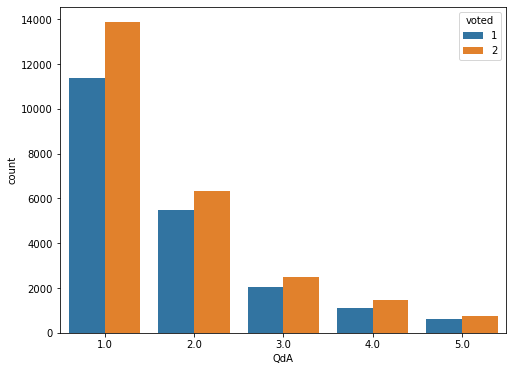

In [252]:
# 가설1: 고민 시간이 긴 질문은 영향을 많이 주는 질문일 것이다.-> Qd
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'QdA', hue = train_y)

In [253]:
# 가설2: 특정 성향의 사람들은 답변 응답시간이 더 길 것이다.
def plot_to_voted(data, var, target):
    plt.figure(figsize = (8,6))
    for tar in target:
        u = np.percentile(data[data['voted']==tar][var],95)
        d = np.percentile(data[data['voted']==tar][var],5)
        column = [val for val in data[data['voted']==tar][var] if d < val < u]
        sns.distplot(column)
    plt.title(var)
    plt.legend(target)
    plt.show()

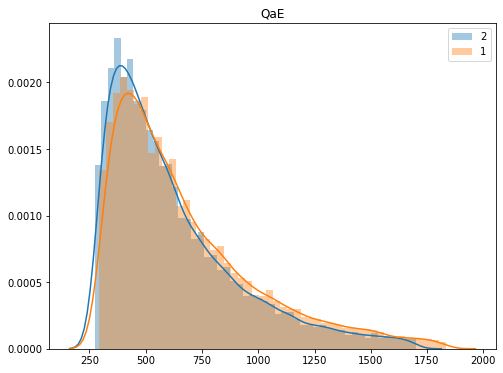

In [254]:
plot_to_voted(train, 'QaE', train_y.unique())

# Modeling

In [255]:
# 변수 제거
drop_last = ['familysize', 'gender_code','hand','education']
new_train= train.drop(drop_last, axis = 1)
new_train = new_train.drop(['voted'], axis = 1)
test = test.drop(drop_last, axis = 1)

In [260]:
new_train.head()

,QaE,QdA,engnat,married,age_group_code,race_code,religion_code
index,,,,,,,
0,363,1.0,1,3,3,6,10
1,647,5.0,2,1,2,1,7
2,1623,4.0,1,2,3,6,10
3,504,3.0,2,1,2,1,7
4,927,2.0,1,2,2,6,0


In [257]:
test.head()

,QaE,QdA,engnat,married,age_group_code,race_code,religion_code
index,,,,,,,
0,736,1.0,2,1,1,6,6
1,514,3.0,2,1,1,5,3
2,500,2.0,2,2,3,5,5
3,669,2.0,1,2,6,6,3
4,499,2.0,1,1,1,6,0


In [261]:
model = lgbm.LGBMClassifier(n_estimators=500)
model.fit(new_train, train_y)

LGBMClassifier(n_estimators=500)

In [262]:
pred_y = model.predict(test)

In [263]:
pred_y

array([2, 2, 1, ..., 1, 1, 2], dtype=int64)

# submission

In [264]:
submission['voted']=pred_y

In [265]:
submission

,voted
index,
0,2
1,2
2,1
3,1
4,2
...,...
11378,2
11379,2
11380,1


In [266]:
submission.to_csv('/sample_submission.csv')